In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
nyc=pd.read_csv('NYC311data.csv')


In [29]:
nyc['Created Date']=pd.to_datetime(nyc['Created Date'])
nyc['Closed Date']=pd.to_datetime(nyc['Closed Date'])
nyc.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31


In [30]:
nyc['Request_Closing_Time']=nyc['Closed Date']-nyc['Created Date']
nyc

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",0 days 02:00:31
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",0 days 03:07:17
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",0 days 04:05:33


In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17148\2289455047.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_counts = rest_of_complaints.append(pd.Series({item: len(nyc[nyc['Complaint Type'] == item]) for item in specific_items}))


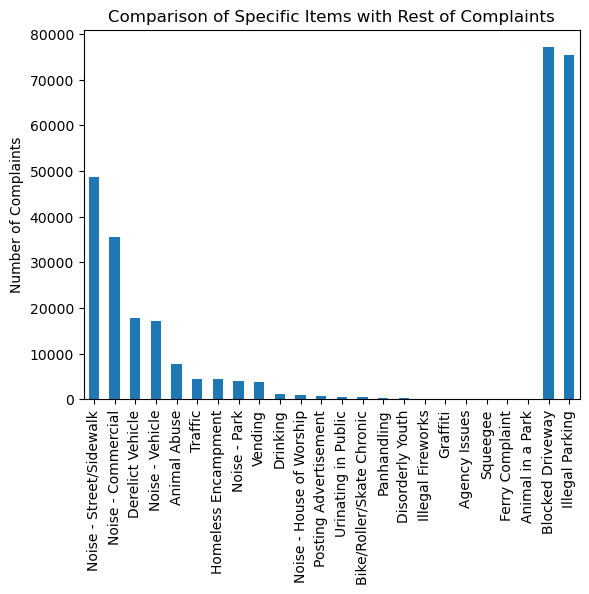

In [33]:
specific_items = ['Blocked Driveway', 'Illegal Parking']

# Filter the DataFrame for the specific items
specific_item_data = nyc[nyc['Complaint Type'].isin(specific_items)]

# Count the occurrences of each complaint type
complaint_counts = nyc['Complaint Type'].value_counts()

# Remove the specific items from the counts
rest_of_complaints = complaint_counts.drop(specific_items)

# Combine 'Rest of Complaints' with the specific items
combined_counts = rest_of_complaints.append(pd.Series({item: len(nyc[nyc['Complaint Type'] == item]) for item in specific_items}))

# Create a bar plot for each category
combined_counts.plot(kind='bar')
plt.ylabel('Number of Complaints')
plt.title(f'Comparison of Specific Items with Rest of Complaints')
plt.show()



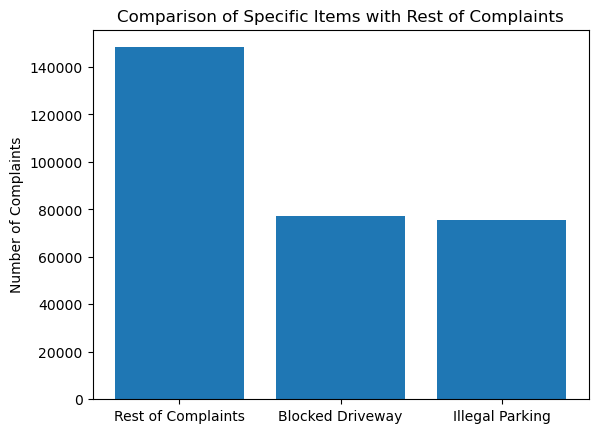

In [34]:
specific_items = ['Blocked Driveway', 'Illegal Parking']

# Filter the DataFrame for the specific items
specific_item_data = nyc[nyc['Complaint Type'].isin(specific_items)]

# Count the occurrences of each complaint type
complaint_counts = nyc['Complaint Type'].value_counts()

# Remove the specific items from the counts
rest_of_complaints = complaint_counts.drop(specific_items)

# Create a bar plot to compare each specific item with the rest
plt.bar(['Rest of Complaints'] + specific_items, [rest_of_complaints.sum()] + [len(specific_item_data[specific_item_data['Complaint Type'] == item]) for item in specific_items])
plt.ylabel('Number of Complaints')
plt.title('Comparison of Specific Items with Rest of Complaints')
plt.show()

In [67]:
DataFrame=nyc.groupby(['City','Status']).size().unstack().fillna(0)

DataFrame.sort_values(by='Closed', ascending=False).head()

Status,Assigned,Closed,Draft,Open
City,,,,
BROOKLYN,19.0,98275.0,1.0,12.0
NEW YORK,15.0,65961.0,0.0,18.0
BRONX,6.0,40690.0,1.0,5.0
STATEN ISLAND,2.0,12335.0,0.0,6.0
JAMAICA,1.0,7286.0,0.0,9.0


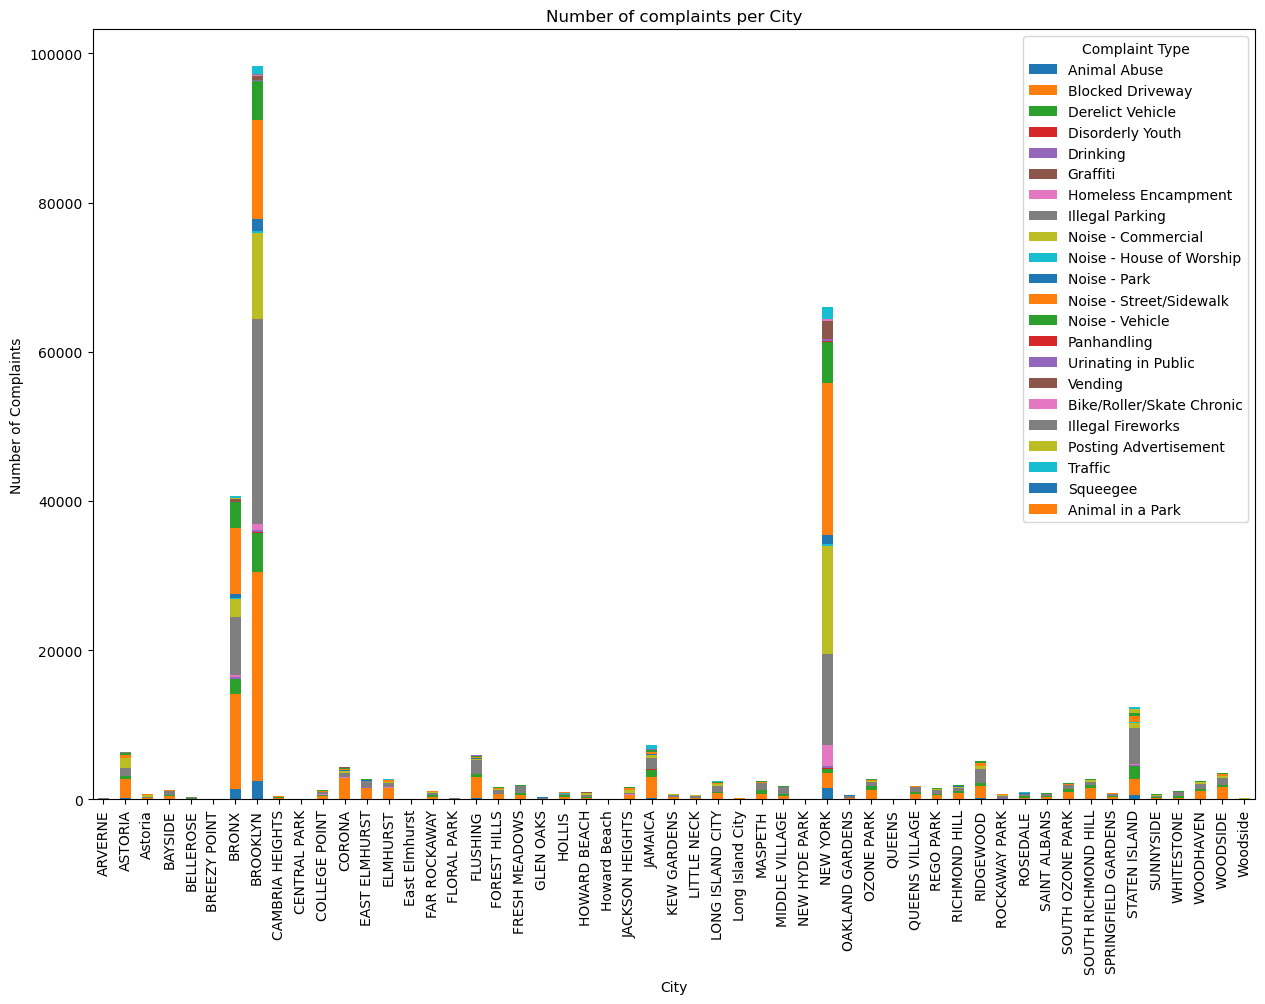

In [66]:
df=nyc.groupby(['City','Complaint Type']).size().unstack().fillna(0)
df
df.plot.bar(figsize=(15,10), stacked=True)
plt.ylabel('Number of Complaints')
plt.title('Number of complaints per City')
plt.show()

In [68]:
CityStat=nyc.groupby(['Complaint Type','Status']).size().unstack().fillna(0)
CityStat.sort_values(by='Open', ascending=False).head()

Status,Assigned,Closed,Draft,Open
Complaint Type,,,,
Illegal Parking,257.0,74515.0,0.0,589.0
Noise - Street/Sidewalk,201.0,48068.0,1.0,342.0
Noise - Commercial,156.0,35245.0,0.0,176.0
Blocked Driveway,98.0,76793.0,1.0,152.0
Derelict Vehicle,27.0,17585.0,0.0,106.0


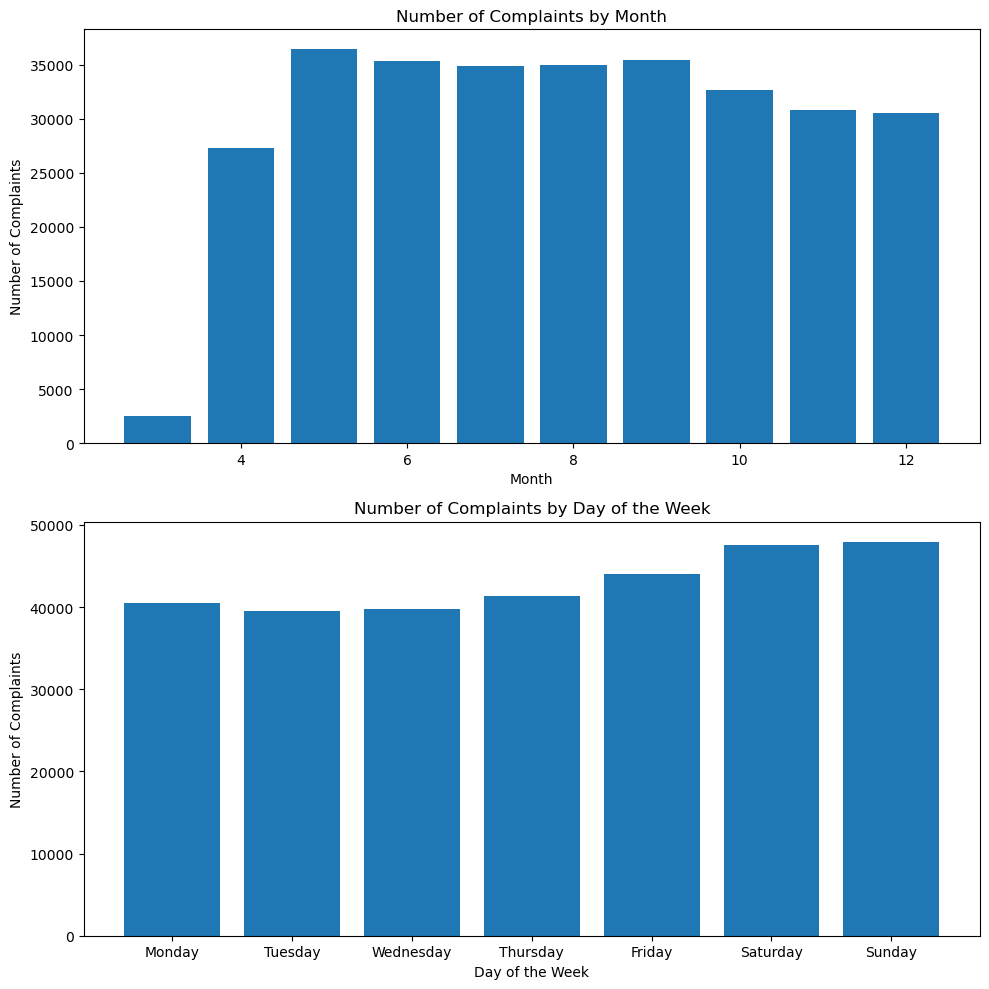

In [69]:
nyc['Month'] = nyc['Created Date'].dt.month
nyc['DayOfWeek'] = nyc['Created Date'].dt.day_name()

# per month
complaints_by_month = nyc.groupby('Month')['Complaint Type'].count()

# per day of the week
complaints_by_day = nyc.groupby('DayOfWeek')['Complaint Type'].count()

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plotting complaints by month
axes[0].bar(complaints_by_month.index, complaints_by_month.values)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Complaints')
axes[0].set_title('Number of Complaints by Month')

# Plotting complaints by day of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
axes[1].bar(complaints_by_day.reindex(days_order).index, complaints_by_day.reindex(days_order).values)
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Complaints')
axes[1].set_title('Number of Complaints by Day of the Week')

plt.tight_layout()
plt.show()